In [1]:
# import libraries
import pandas as pd
import matplotlib
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statistics as st
from sklearn import preprocessing
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline 

# Donald Trump (clustering)

## Data exploration

In [2]:
# upload dataset Donuld Trump
donald_df = pd.read_csv('States_donald_mined.csv')
print('Dimension of array:{}'.format(donald_df.shape))
donald_df

Dimension of array:(51, 6)


,STATE_NAME,likes,retweet_count,user_followers_count,TextBlob_Subjectivity,TextBlob_Polarity
0,Alabama,3.395514,0.759150,6022.579693,0.356253,0.078854
1,Alaska,1.160656,0.252459,3501.511475,0.346078,0.065971
2,Arizona,3.622688,0.937522,3226.875393,0.336977,0.054392
3,Arkansas,1.164763,0.251223,1034.484502,0.306879,0.042399
4,California,5.054170,1.311086,7302.158661,0.324595,0.042585
5,Colorado,1.427861,0.349917,3484.702598,0.338561,0.032250
6,Connecticut,6.236635,2.595968,3952.455741,0.284664,0.044485
7,Delaware,0.612245,0.134694,1614.330612,0.225753,0.014957
8,District of Columbia,37.077868,8.479700,21396.684676,0.308389,0.046990
9,Florida,3.248265,1.124550,32686.844859,0.308331,0.060683


In [3]:
# let's see the presence of correlations between values 
donald_df.corr ()

,likes,retweet_count,user_followers_count,TextBlob_Subjectivity,TextBlob_Polarity
likes,1.000000,0.943471,0.565869,-0.203372,-0.006328
retweet_count,0.943471,1.000000,0.525624,-0.241366,-0.023877
user_followers_count,0.565869,0.525624,1.000000,-0.178058,0.113695
TextBlob_Subjectivity,-0.203372,-0.241366,-0.178058,1.000000,0.046481
TextBlob_Polarity,-0.006328,-0.023877,0.113695,0.046481,1.000000


Strong correlation can be found between 2 features: likes and retweet_count 

Text(0, 0.5, 'retweet_count')

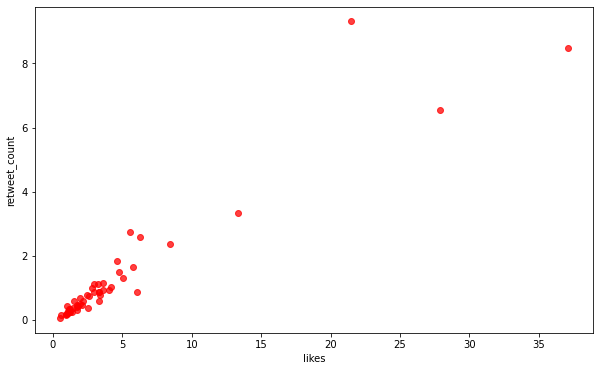

In [4]:
# scatter plots of two parameters with high correlation
col1 = 'likes'
col2 = 'retweet_count'

plt.figure(figsize=(10, 6))

plt.scatter(donald_df[col1],
            donald_df[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [5]:
# find out datatypes
donald_df.dtypes

STATE_NAME                object
likes                    float64
retweet_count            float64
user_followers_count     float64
TextBlob_Subjectivity    float64
TextBlob_Polarity        float64
dtype: object

In [6]:
# checking for which columns consist missing values
donald_df.isnull().any().any()

False

In [7]:
# to see full info about the data at once we can use info()
donald_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATE_NAME             51 non-null     object 
 1   likes                  51 non-null     float64
 2   retweet_count          51 non-null     float64
 3   user_followers_count   51 non-null     float64
 4   TextBlob_Subjectivity  51 non-null     float64
 5   TextBlob_Polarity      51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


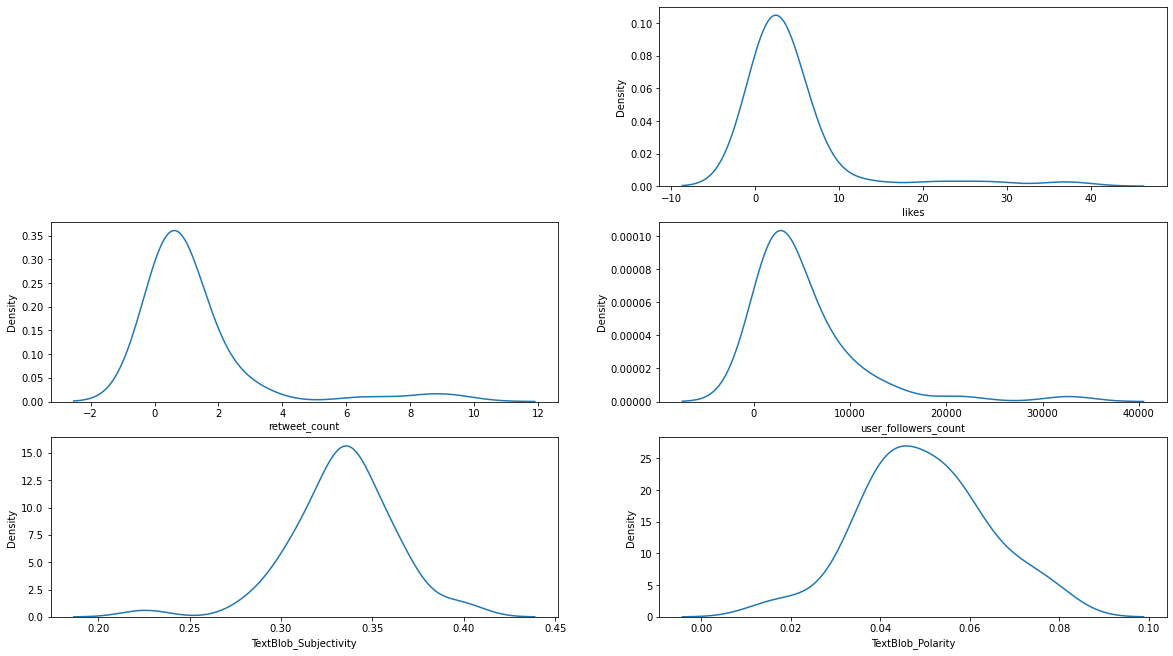

In [8]:
#lets see data distribution to check how skewed our data
plt.figure(figsize=(20,35))
for i, col in enumerate(donald_df.columns):
    if donald_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(donald_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Some data is skewed.

## Data preprocessing

In [9]:
# Firstly we should drop the columns which are not important for clustering 
# Names of states do not influence the results of clustering
donald_df.drop(['STATE_NAME'], axis=1, inplace=True)

In [10]:
# lets try to to get at least a little bit better distribution
columns = ['likes', 'retweet_count', 'user_followers_count', 'TextBlob_Subjectivity', 'TextBlob_Polarity']

for col in columns:
    donald_df[col] = np.log(1 + donald_df[col])

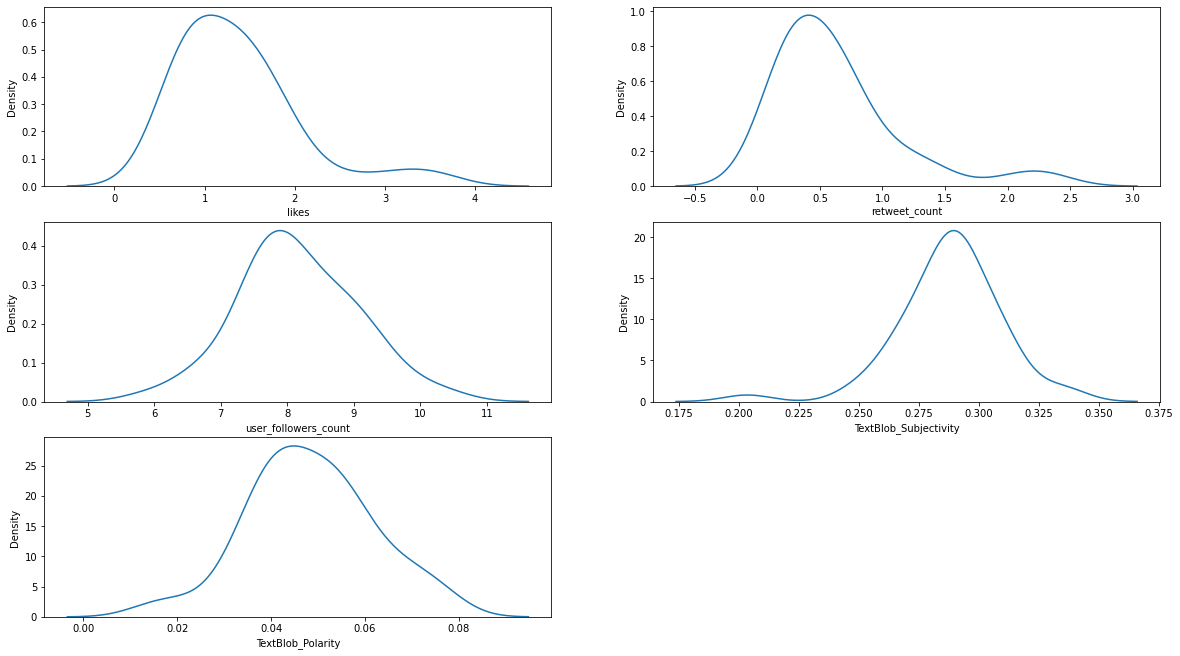

In [11]:
plt.figure(figsize=(20,35))
for i, col in enumerate(donald_df.columns):
    if donald_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(donald_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

The distribution now looks better.

In [12]:
# rounding to 3 decimal
donald_df = donald_df.round(3)

To handle the correlation we can do dimensionality reduction and bring the data down to lower dimension.
But before we can do PCA (principal component analysis), we should make sure that there are no infinite or NaN values.

In [13]:
# checking for infinity 
ds = donald_df.isin([np.inf, -np.inf])
print(ds)

    likes  retweet_count  user_followers_count  TextBlob_Subjectivity  \
0   False          False                 False                  False   
1   False          False                 False                  False   
2   False          False                 False                  False   
3   False          False                 False                  False   
4   False          False                 False                  False   
5   False          False                 False                  False   
6   False          False                 False                  False   
7   False          False                 False                  False   
8   False          False                 False                  False   
9   False          False                 False                  False   
10  False          False                 False                  False   
11  False          False                 False                  False   
12  False          False                 False     

In [14]:
# printing the count of infinity values
print("\nCount of infinity values: \n")
count = donald_df.isin([np.inf, -np.inf]).values.sum()
print("It contains " + str(count) + " infinite values")


Count of infinity values: 

It contains 0 infinite values


In [15]:
np.any(np.isnan(donald_df))

False

In [16]:
np.all(np.isfinite(donald_df))

True

In [17]:
# PCA (principal component analysis)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
donald_pca = pca.fit_transform(donald_df)

In [18]:
# Calculate Euclidean distance (distance between dataset)
# This will ensure that the elements are combined into clusters and store them in a special variable
data_dist = pdist (donald_pca, 'euclidean')
data_linkage = linkage (data_dist, method = 'average')

## Determining the number of clusters

### Elbow method

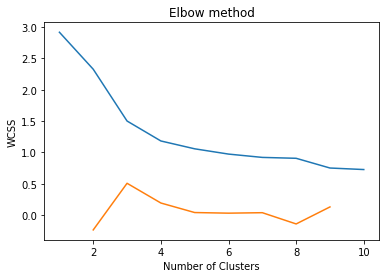

clusters: 3


In [19]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = acceleration_rev.argmax()+ 2 
print("clusters:", k)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


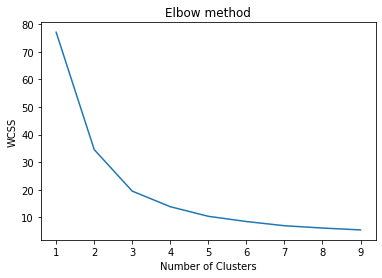

In [20]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(donald_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The best number of clusters is selected in the point where two lines (blue and orange lines in the picture above) are the most close to each other. Here we should stick to 3 clusters.

### Silhouette coefficient

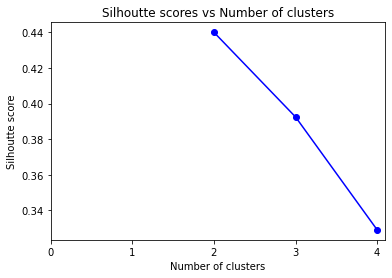

In [21]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(donald_pca, model.labels_) for model in kmeans_models[5:8]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([0,1,2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [22]:
# determine the number of clusters using the K-means method
for n_cluster in range (2, 11):
    kmeans = KMeans (n_clusters = n_cluster) .fit (donald_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score (donald_pca, label, metric = 'euclidean')
    print ("For n_clusters = {}, The Silhouette Coefficient is {}". format (n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.48457964904822876
For n_clusters = 3, The Silhouette Coefficient is 0.501786378694421
For n_clusters = 4, The Silhouette Coefficient is 0.47084989080080586
For n_clusters = 5, The Silhouette Coefficient is 0.4369901445936506
For n_clusters = 6, The Silhouette Coefficient is 0.44012504936989333
For n_clusters = 7, The Silhouette Coefficient is 0.400453239205691
For n_clusters = 8, The Silhouette Coefficient is 0.3233661370562024
For n_clusters = 9, The Silhouette Coefficient is 0.32808396185736155
For n_clusters = 10, The Silhouette Coefficient is 0.3713389548007312


According to the Silhouette coefficient we should stick to 3 clusters.

## Clustering 

### Clustering with K-means

In [23]:
# build clustering using the KMeans method
km = KMeans(n_clusters = 3).fit(donald_pca)

In [24]:
# display the resulting distribution by clusters
# also the number of the cluster to which the string belongs
clustersKmean = km.labels_ + 1
clustersKmean

array([1, 2, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2])

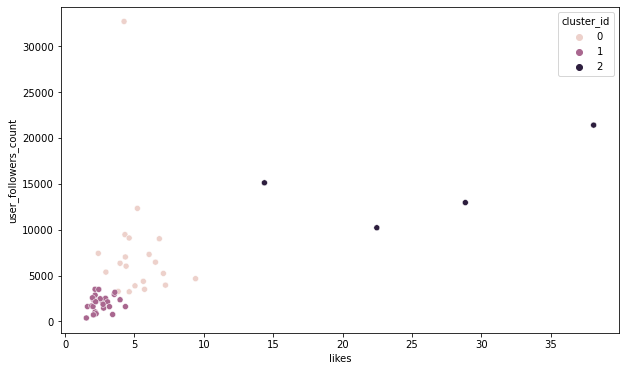

In [25]:
#Lets visialize the clusters
donald_df['cluster_id'] = km.labels_
for col in columns:
    donald_df[col] = np.exp(donald_df[col])
    
plt.figure(figsize=(10,6))
sns.scatterplot(data=donald_df, x='likes', y='user_followers_count', hue='cluster_id')
plt.show()

In [26]:
# add cluster numbers to the original data
dataK = donald_df
dataK['group_no'] = clustersKmean

In [27]:
# Creating a new file with clusters
writer = pd.ExcelWriter('donald_df_for_clust.xlsx')
dataK.to_excel(writer, 'KMeans')
writer.save()

### Hierarchical clustering and dendrogram

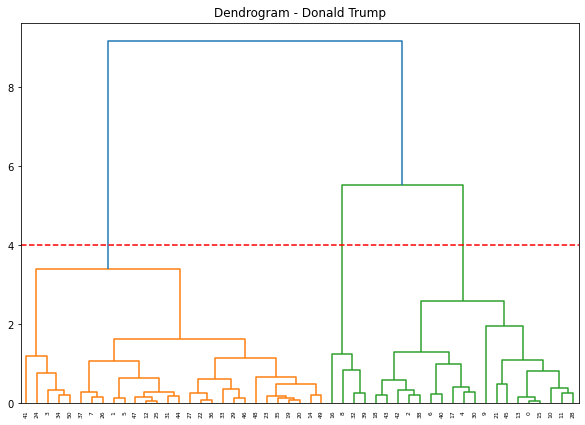

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram - Donald Trump")  
dend = shc.dendrogram(shc.linkage(donald_pca, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

From hierarchical clustering we also see that the best number of clusters is equal to 3.

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(donald_pca)

array([1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0], dtype=int64)

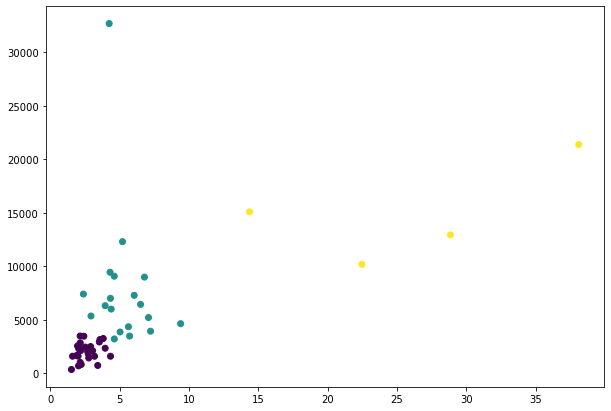

In [30]:
plt.figure(figsize=(10, 7))  
plt.scatter(donald_df['likes'], donald_df['user_followers_count'], c=cluster.labels_) 

Although the clusters of some points differ from the results got after K-means clustering, the pattern is the same.

# Joe Biden (clustering)

## Data exploration

In [31]:
# upload dataset Donuld Trump
joe_df = pd.read_csv('States_joe_mined.csv')
print('Dimension of array:{}'.format(donald_df.shape))
joe_df

Dimension of array:(51, 7)


,STATE_NAME,likes,retweet_count,user_followers_count,TextBlob_Subjectivity,TextBlob_Polarity
0,Alabama,3.395514,0.759150,6022.579693,0.356253,0.078854
1,Alaska,1.160656,0.252459,3501.511475,0.346078,0.065971
2,Arizona,3.622688,0.937522,3226.875393,0.336977,0.054392
3,Arkansas,1.164763,0.251223,1034.484502,0.306879,0.042399
4,California,5.054170,1.311086,7302.158661,0.324595,0.042585
5,Colorado,1.427861,0.349917,3484.702598,0.338561,0.032250
6,Connecticut,6.236635,2.595968,3952.455741,0.284664,0.044485
7,Delaware,0.612245,0.134694,1614.330612,0.225753,0.014957
8,District of Columbia,37.077868,8.479700,21396.684676,0.308389,0.046990
9,Florida,3.248265,1.124550,32686.844859,0.308331,0.060683


In [32]:
# let's see the presence of correlations between values 
joe_df.corr ()

,likes,retweet_count,user_followers_count,TextBlob_Subjectivity,TextBlob_Polarity
likes,1.000000,0.943471,0.565869,-0.203372,-0.006328
retweet_count,0.943471,1.000000,0.525624,-0.241366,-0.023877
user_followers_count,0.565869,0.525624,1.000000,-0.178058,0.113695
TextBlob_Subjectivity,-0.203372,-0.241366,-0.178058,1.000000,0.046481
TextBlob_Polarity,-0.006328,-0.023877,0.113695,0.046481,1.000000


Text(0, 0.5, 'retweet_count')

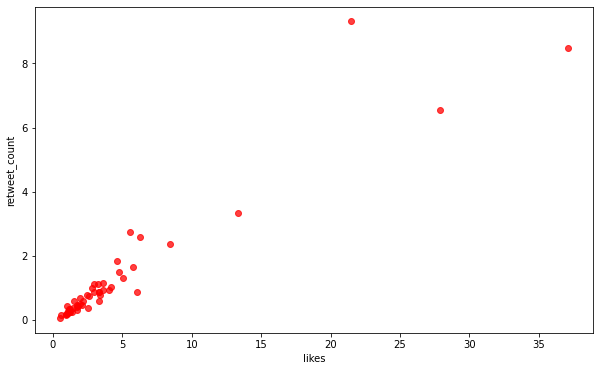

In [33]:
#Strong correlation can be found between 2 features: likes and retweet_count 
# scatter plots of two parameters with high correlation
col1 = 'likes'
col2 = 'retweet_count'

plt.figure(figsize=(10, 6))

plt.scatter(joe_df[col1],
            joe_df[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [34]:
joe_df.isnull().any().any()

False

In [35]:
joe_df.dtypes

STATE_NAME                object
likes                    float64
retweet_count            float64
user_followers_count     float64
TextBlob_Subjectivity    float64
TextBlob_Polarity        float64
dtype: object

In [36]:
joe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATE_NAME             51 non-null     object 
 1   likes                  51 non-null     float64
 2   retweet_count          51 non-null     float64
 3   user_followers_count   51 non-null     float64
 4   TextBlob_Subjectivity  51 non-null     float64
 5   TextBlob_Polarity      51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


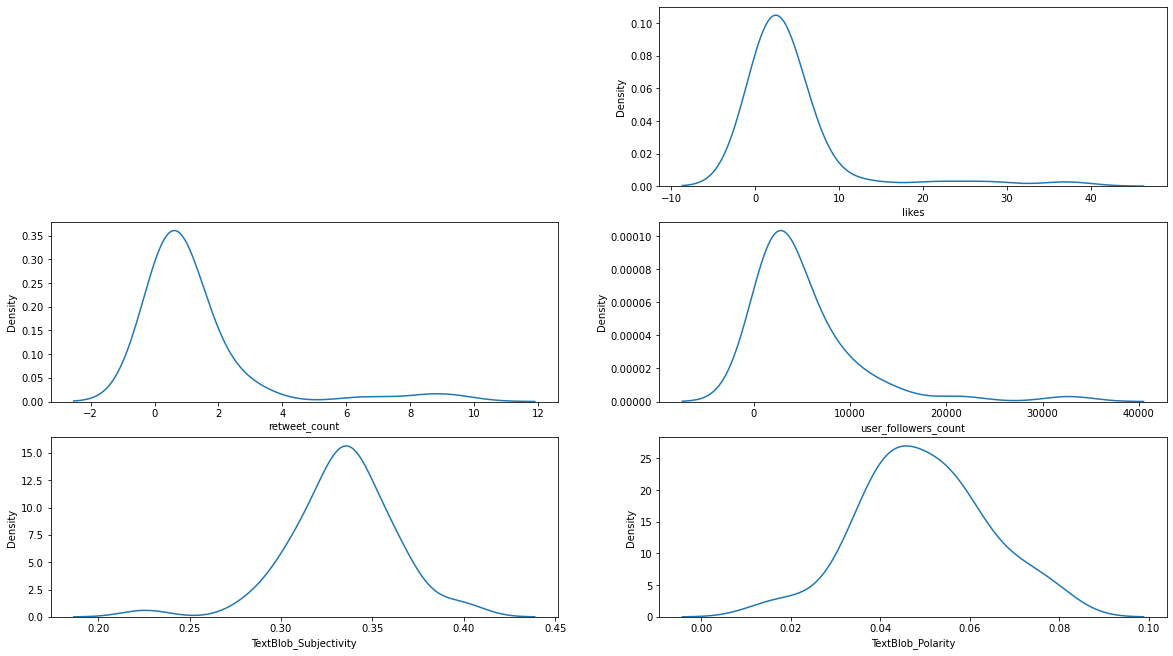

In [37]:
#lets see data distribution to check how skewed our data
plt.figure(figsize=(20,35))
for i, col in enumerate(joe_df.columns):
    if joe_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(joe_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

## Data processing

In [38]:
# Firstly we should drop the columns which are not important for clustering 
# Names of states do not influence the results of clustering
joe_df.drop(['STATE_NAME'], axis=1, inplace=True)

In [39]:
# lets try to to get at least a little bit better distribution
columns = ['likes', 'retweet_count', 'user_followers_count', 'TextBlob_Subjectivity', 'TextBlob_Polarity']

for col in columns:
    joe_df[col] = np.log(1 +joe_df[col])

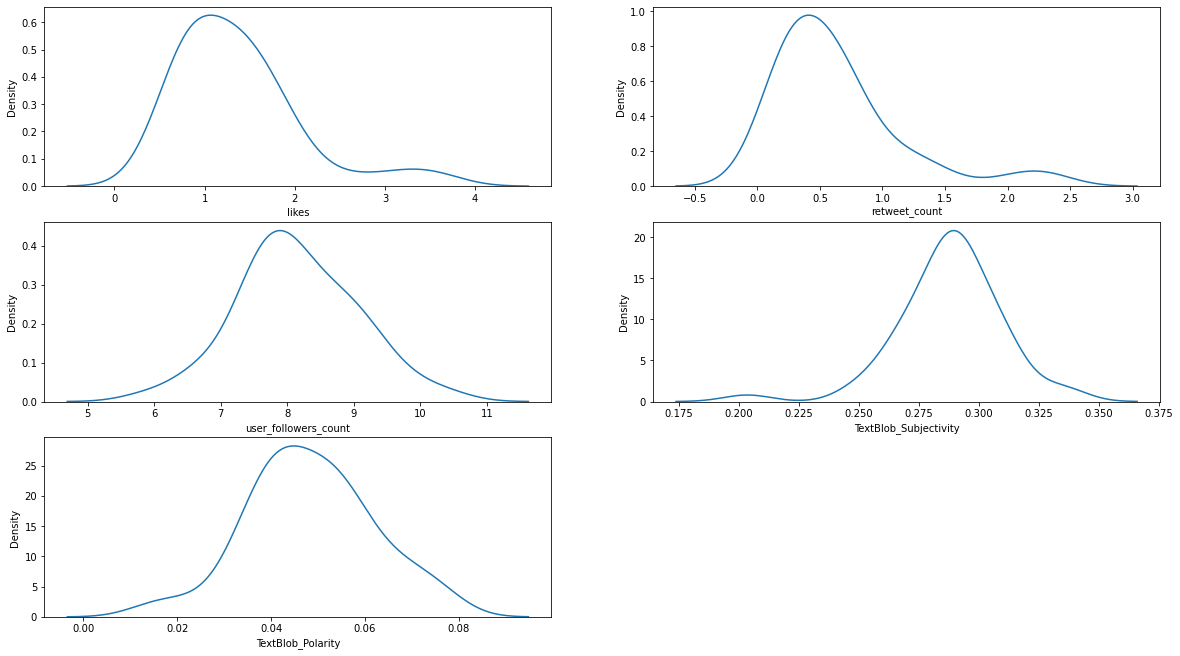

In [40]:
plt.figure(figsize=(20,35))
for i, col in enumerate(joe_df.columns):
    if joe_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(joe_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [41]:
# rounding to 3 decimal
joe_df = joe_df.round(3)

In [42]:
# checking for infinity 
a = joe_df.isin([np.inf, -np.inf])
print(a)

    likes  retweet_count  user_followers_count  TextBlob_Subjectivity  \
0   False          False                 False                  False   
1   False          False                 False                  False   
2   False          False                 False                  False   
3   False          False                 False                  False   
4   False          False                 False                  False   
5   False          False                 False                  False   
6   False          False                 False                  False   
7   False          False                 False                  False   
8   False          False                 False                  False   
9   False          False                 False                  False   
10  False          False                 False                  False   
11  False          False                 False                  False   
12  False          False                 False     

In [43]:
# printing the count of infinity values
print("\nCount of infinity values: \n")
count = joe_df.isin([np.inf, -np.inf]).values.sum()
print("It contains " + str(count) + " infinite values")


Count of infinity values: 

It contains 0 infinite values


In [44]:
# PCA (principal component analysis) to work on correlation
pca1 = PCA(n_components=0.95)
joe_pca = pca.fit_transform(joe_df)

In [45]:
# Calculate Euclidean distance (distance between dataset)
# This will ensure that the elements are combined into clusters and store them in a special variable
data_dis = pdist (joe_pca, 'euclidean')
data_link = linkage (data_dis, method = 'average')

## Determining the number of clusters

### Elbow method

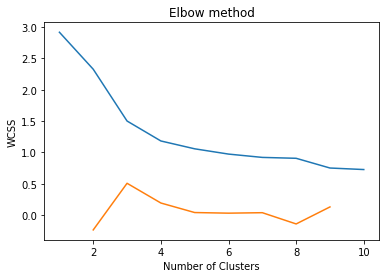

clusters: 3


In [46]:
last = data_link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = acceleration_rev.argmax()+ 2 
print("clusters:", k)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


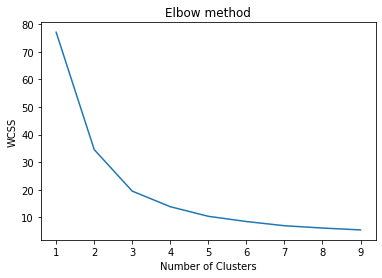

In [47]:
kmeans_2 = [KMeans(n_clusters=k, random_state=23).fit(joe_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_2]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Should choose k = 3 (3 clusters)

### Silhouette coefficient

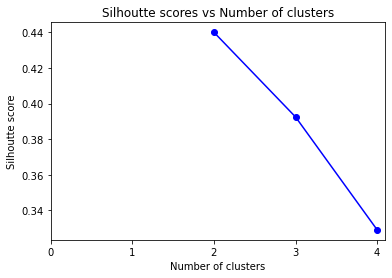

In [48]:
silhoutte_scores2 = [silhouette_score(joe_pca, model.labels_) for model in kmeans_2[5:8]]
plt.plot(range(2,5), silhoutte_scores2, "bo-")
plt.xticks([0,1,2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [49]:
# determine the number of clusters using the K-means method
for n_cluster in range (2, 11):
    kmeans = KMeans (n_clusters = n_cluster) .fit (joe_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score (joe_pca, label, metric = 'euclidean')
    print ("For n_clusters = {}, The Silhouette Coefficient is {}". format (n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.485583613915136
For n_clusters = 3, The Silhouette Coefficient is 0.501786378694421
For n_clusters = 4, The Silhouette Coefficient is 0.47084989080080586
For n_clusters = 5, The Silhouette Coefficient is 0.436539134571293
For n_clusters = 6, The Silhouette Coefficient is 0.44012504936989333
For n_clusters = 7, The Silhouette Coefficient is 0.400453239205691
For n_clusters = 8, The Silhouette Coefficient is 0.3509009934657569
For n_clusters = 9, The Silhouette Coefficient is 0.327981406675314
For n_clusters = 10, The Silhouette Coefficient is 0.3086533813656375


Conclusion: 3 clusters.

## Clustering

### K-means

In [50]:
# build clustering using the KMeans method
KM = KMeans(n_clusters = 3).fit(joe_pca)

In [51]:
# display the resulting distribution by clusters
# also the number of the cluster to which the string belongs
clusters_KM = KM.labels_ + 1
clusters_KM 

array([2, 1, 2, 1, 2, 1, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 1])

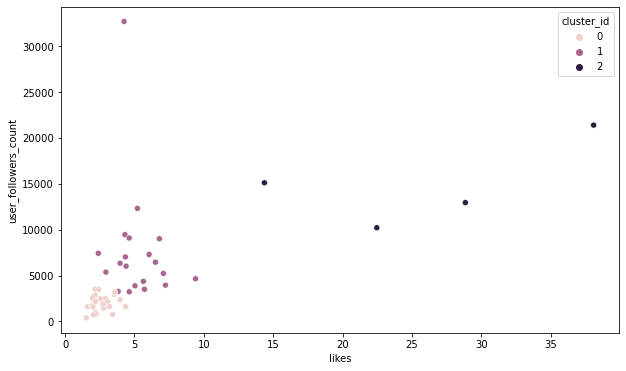

In [52]:
#Lets visialize the clusters
joe_df['cluster_id'] = KM.labels_
for col in columns:
    joe_df[col] = np.exp(joe_df[col])
    
plt.figure(figsize=(10,6))
sns.scatterplot(data=joe_df, x='likes', y='user_followers_count', hue='cluster_id')
plt.show()

In [53]:
# add cluster numbers to the original data
dataKmean = joe_df
dataKmean['group_no'] = clustersKmean

In [54]:
# Creating a new file with clusters
writer = pd.ExcelWriter('joe_df_for_clust.xlsx')
dataKmean.to_excel(writer, 'KMeans')
writer.save()

### Hierarchical clustering and dendrogram

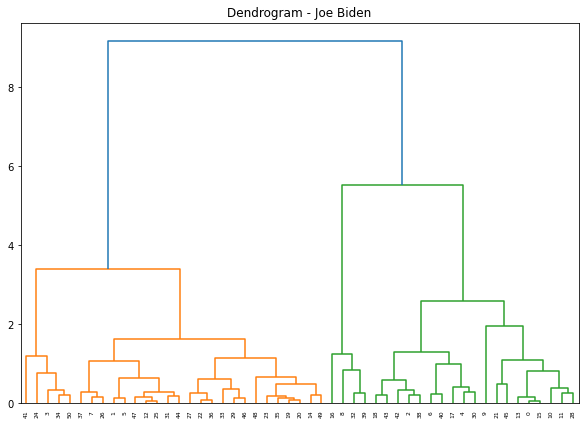

In [55]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram - Joe Biden")  
d = shc.dendrogram(shc.linkage(joe_pca, method='ward'))
plt.axhline(y=25000, color='r', linestyle='--')

In [56]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clustering.fit_predict(joe_pca)

array([1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0], dtype=int64)

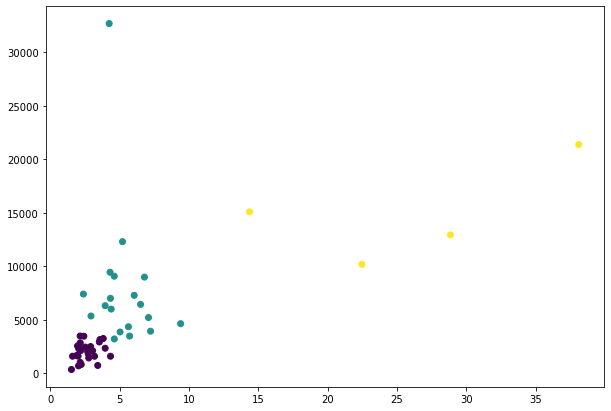

In [57]:
plt.figure(figsize=(10, 7))  
plt.scatter(joe_df['likes'], joe_df['user_followers_count'], c=cluster.labels_) 

Although the clusters of some points differ from the results got after K-means clustering, the pattern is the same.